In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
os.environ['KAGGLE_USERNAME'] = "davidfmora"
os.environ['KAGGLE_KEY'] = "204c0028a80148851fdab46383061779"

!kaggle competitions download -c house-prices-advanced-regression-techniques # descarga de los datos


sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# nombres de los csv
test_csv = "test.csv"
train_csv = "train.csv"
# dataframes de los datos
houses_train = pd.read_csv(train_csv,index_col=0)
houses_test = pd.read_csv(test_csv, index_col=0)

(1459, 79)

In [ ]:
# separacion de muestras y targets
train_samples = houses_train.iloc[:, :79]
train_prices = houses_train.iloc[:, -1]

train_prices_array = train_prices.to_numpy().astype("float64")
# resumen de los precios
train_prices.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
# dataframe de caracteristicas cualitativas
categorical = train_samples.select_dtypes(include=["object"])
categorical_test = houses_test.select_dtypes(include=["object"])

total_ds = pd.concat([categorical, categorical_test], axis=0)
total_categorical = pd.get_dummies(total_ds)

dummy_train = total_categorical.iloc[:1460,:].to_numpy().astype("float64")
dummy_test = total_categorical.iloc[1460:,:].to_numpy().astype("float64")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# construccion del modelo
model = models.Sequential([layers.Dense(128, activation='relu', input_shape=((252,))),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(1)])

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
for i in range(4):
    cat_x, val_x, cat_y, val_y = train_test_split(dummy_train, train_prices_array, test_size=0.33)
    history = model.fit(cat_x, cat_y, epochs=150, batch_size = 30, verbose=0)

In [ ]:
# evaluacion del modelo
model.evaluate(val_x, val_y)
# Error absoluto medio de 27k

16/16 [==============================] - 0s 2ms/step - loss: 41247612.0000 - mae: 4528.3677


[41247612.0, 4528.36767578125]

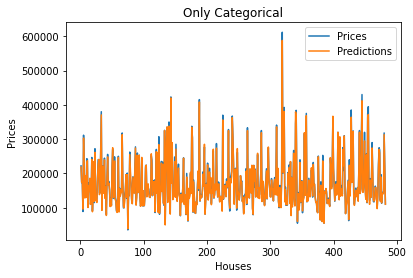

In [ ]:
predictions = model.predict(val_x)

plt.plot(range(1, len(val_x) + 1), val_y,label='Prices')
plt.plot(range(1, len(val_x) + 1), predictions,label='Predictions')

plt.title("Only Categorical")
plt.xlabel('Houses')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [ ]:
predictions = [x[0] for x in list(model.predict(dummy_test))]

sample = pd.read_csv("sample_submission.csv")
out = pd.DataFrame({"Id":sample.Id, "SalePrice": predictions})

out.to_csv("submission.csv",index=False)


In [264]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "First Attempt"

100% 25.6k/25.6k [00:00<00:00, 99.0kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques